In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from numpy import argmax


In [2]:
# Load the MNIST data.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

x_train_sample = X_train[:200]
x_test_sample = X_train[:500]

# Turning the outputs into one-hot encoded representations
y_train_one = to_categorical(y_train)
#y_train_one = np.array([encoding.reshape(1,-1) for encoding in y_train_one]) # reshape from (10,) to (1,10)

y_test_one = to_categorical(y_test)
#y_test_one = np.array([encoding.reshape(1,-1) for encoding in y_test_one]) # reshape from (10,) to (1,10)

y_train_one_sample = y_train_one[:200]
y_test_one_sample = y_train_one_sample[:500]


print("x_train shape: " + str(x_train_sample.shape))
print("y_train shape: " + str(y_train_one_sample[0]))
print("argmax: " + str(argmax(y_train_one_sample[0]))) # use argmax to get the corresponding digit

x_train shape: (200, 28, 28)
y_train shape: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
argmax: 5


In [3]:
#### FLAT MODEL ####

np.random.seed(1)
np.random.RandomState(1)

from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense, Convolutional, Flatten

network = GWUNetwork()
network.add(Flatten(28,input_channels=1))
network.add(Dense(20, activation='relu'))
network.add(Dense(10)) # no activation, do softmax afterward

# Finally to complete our model we need to compile it. This defines our loss function and learning_rate
network.compile(loss='multiclass_cross_entropy', lr=0.001)
print(network)
network.fit(x_train_sample, y_train_one_sample, epochs=1)

Model:
Flatten - (28, 784)
Dense - (784, 20)
Dense - (20, 10)

(10, 10)


/mnt/d/sync/gw/fall2021/csci6907_neural_networks/gwu_nn/gwu_nn/loss_functions.py:60: RuntimeWarning: invalid value encountered in log
  softmax_cross_entropy_loss = -1.0 * y_true * np.log(y_pred) - (1.0 - y_true) * np.log(1 - y_pred)


ValueError: shapes (20,1) and (10,10) not aligned: 1 (dim 1) != 10 (dim 0)

In [11]:
# Predict using the test set.
raw_predictions = network.predict(x_test_sample)

'''
predictions = [round(x[0][0]) for x in raw_predictions]
actual = [y for y in y_test_sample]
count = 0
for p,a in zip(predictions,actual):
    if p == a:
        count += 1
print("accuracy: " + str(100 * count/len(predictions)))

# show figures where it messed up
'''
np.clip(raw_predictions,0.01,0.99)

array([[[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]]])

In [5]:
#### CNN MODEL ####

np.random.seed(1)
np.random.RandomState(1)

from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense, Convolutional, Flatten, MaxPool

network = GWUNetwork()
network.add(Convolutional(input_size=28, input_channels=1, kernel_size=3, num_kernels=1, activation='relu'))
network.add(MaxPool(28,2)) # works better without pooling
network.add(Flatten(14,input_channels=1)) # input size = 28
network.add(Dense(40, activation='relu'))
network.add(Dense(1, add_bias=False, activation='sigmoid'))

# Finally to complete our model we need to compile it. This defines our loss function and learning_rate
network.compile(loss='log_loss', lr=0.001)
print(network)

Model:
Convolutional - (28, 28)
MaxPool - (28, 14)
Flatten - (14, 196)
Dense - (196, 40)
Dense - (40, 1)



In [6]:
network.fit(x_train_sample, y_train_sample, epochs=1)

epoch 1/1   error=nan


In [7]:
# Predict using the test set.
raw_predictions = network.predict(x_test_sample)

# calculate accuracy and show incorrect classifications
predictions = [round(x[0][0]) for x in raw_predictions]
count = 0
for p,a,i in zip(predictions,y_test_sample,i_test_sample):
    if p == a:
        count += 1
    else:
        pass
        #print("Prediction: " + str(p))
        #ax = plt.subplot()
        #plt.imshow(X_test[i], cmap='gray')
        #plt.show()
        
print("accuracy: " + str(100 * count/len(predictions)))
#print(predictions)
#print(y_test_sample)

accuracy: 89.0


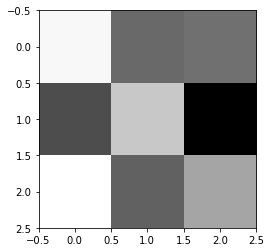

In [8]:
# print out the kernel weights 
kernel = network.layers[0].kernels.reshape(3,3)

plt.imshow(kernel, cmap='gray')